# Mean Shift
Mean Shift is a model that there is a certain density function (probabilistic) that explains the distgribution of the data, and tries to place centroids to maximice the likelihood as a function of the data using KDE (Kernel Density Estimation) techniques.

**The algorithm define a window (bandwidth)** to select a cluster point and compute the mean for all points of this windows, after move the center of the window to the location of the mean an it repeats itself over and over again till the algorithm finish

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from mpl_toolkits import mplot3d
from pandas_profiling import ProfileReport
import warnings
warnings.filterwarnings('ignore')

## Dataset
This dataset is only for learn to use sklearn MeanShift algorithm, don't use datasets with 20 rows to make clustering in real life to have conclussions, you need more data if you want that a cluster algorithm work well

In [2]:
df_stats = pd.read_csv('C:/Users/alberto.rubiales/PycharmProjects/Pycharm/Mean Shift/epl_1819.csv')
df_stats['Team'] = df_stats['Team'].str.strip()
# df_stats.set_index(['Team'], inplace=True)
# del df_stats.index.name
# df_stats.index = df_stats.index.str.strip()
df_financial = pd.read_csv('C:/Users/alberto.rubiales/PycharmProjects/Pycharm/Mean Shift/transfer.csv')
df_financial = df_financial[['team', 'Total']]
df_financial.rename(columns={'team':'Team'}, inplace=True)
df_financial['Team'] = df_financial['Team'].str.strip()
df_financial['Team'][9] = df_stats.Team[12]
df_football = pd.merge(df_stats, df_financial, how='left', on='Team')
print("Shape:", df_football.shape)
df_football

Shape: (20, 45)


,Team,category,general_league_position,finance _live_games_televised,finance _tv_revenue,general_matches_played,general_won,general_draw,general_lost,attack_scored,...,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed,defence_penalty_conceeded,attack_posession,attack_pass_accuracy,Total
0,Manchester City,Champions League,1,26,150986355,38,32,2,4,95,...,63,362,518,0,543,295,4,64.0,89.0,-1070.83
1,Liverpool,Champions League,2,29,152425146,38,30,7,1,89,...,78,314,610,2,639,317,1,58.8,84.4,-324.86
2,Chelsea,Champions League Qualification,3,25,146030216,38,21,9,8,63,...,73,351,618,2,593,330,2,59.9,87.6,-560.93
3,Tottenham,Champions League Qualification,4,26,145230801,38,23,2,13,67,...,112,326,626,3,770,411,5,56.7,83.2,-16.78
4,Arsenal,Europa League,5,25,142193180,38,21,7,10,73,...,118,412,609,2,762,404,7,56.1,83.3,-281.72
5,Manchester United,Europa League,6,27,142512868,38,19,9,10,65,...,128,355,581,2,785,370,6,53.3,82.3,-666.55
6,Wolverhampton,Europa League Qualification,7,15,127165114,38,16,9,13,47,...,148,501,720,2,824,464,4,47.4,78.2,-159.30
7,Everton,No UEFA Competitions,8,18,128603905,38,15,9,14,54,...,85,456,700,4,825,430,5,51.0,77.3,-208.19
8,Leicester,No UEFA Competitions,9,15,123328078,38,15,7,16,51,...,96,436,676,4,945,500,5,50.8,79.2,-168.69
9,West Ham,No UEFA Competitions,10,16,122528663,38,15,7,16,52,...,141,457,723,5,855,397,5,49.0,78.7,-221.72


In [3]:
df_football.attack_passes_long = df_football.attack_passes_long.str.replace(',', '').astype(float)
df_football.attack_passes = df_football.attack_passes.str.replace(',', '').astype(float)
df_football.attack_passes_back = df_football.attack_passes_back.str.replace(',', '').astype(float)
df_football.defence_clearances = df_football.defence_clearances.str.replace(',', '').astype(float)
df_football_tomodel = df_football.select_dtypes(['number'])
df_football_tomodel.drop(columns=['general_league_position'], inplace=True)
df_football_tomodel

,finance _live_games_televised,finance _tv_revenue,general_matches_played,general_won,general_draw,general_lost,attack_scored,defence_goals_conceeded,general_goal_difference,general_points,...,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed,defence_penalty_conceeded,attack_posession,attack_pass_accuracy,Total
0,26,150986355,38,32,2,4,95,23,72,98,...,63,362,518,0,543.0,295,4,64.0,89.0,-1070.83
1,29,152425146,38,30,7,1,89,22,67,97,...,78,314,610,2,639.0,317,1,58.8,84.4,-324.86
2,25,146030216,38,21,9,8,63,39,24,72,...,73,351,618,2,593.0,330,2,59.9,87.6,-560.93
3,26,145230801,38,23,2,13,67,39,28,71,...,112,326,626,3,770.0,411,5,56.7,83.2,-16.78
4,25,142193180,38,21,7,10,73,51,22,70,...,118,412,609,2,762.0,404,7,56.1,83.3,-281.72
5,27,142512868,38,19,9,10,65,54,11,66,...,128,355,581,2,785.0,370,6,53.3,82.3,-666.55
6,15,127165114,38,16,9,13,47,46,1,57,...,148,501,720,2,824.0,464,4,47.4,78.2,-159.30
7,18,128603905,38,15,9,14,54,46,8,54,...,85,456,700,4,825.0,430,5,51.0,77.3,-208.19
8,15,123328078,38,15,7,16,51,48,3,52,...,96,436,676,4,945.0,500,5,50.8,79.2,-168.69
9,16,122528663,38,15,7,16,52,55,-3,52,...,141,457,723,5,855.0,397,5,49.0,78.7,-221.72


In [4]:
df_mall = pd.read_csv('C:/Users/alberto.rubiales/PycharmProjects/Pycharm/Mean Shift/Mall_Customers.csv')
df_mall.drop(columns=['CustomerID', 'Gender'], inplace=True)
df_mall[:5]

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


## Mean Shift Hyperparameters
* bandwidth: is the kernel that will be used to create the clusters, if a number is not given to the algorithm, the bandwidth is estimated by a internal function of the model.
* seeds: if you want you can pass the initials the clusters centers
* bin_seeding: True/False is to speed up the algorithm
* min_bin_freq: to speed up the algorithm only accept clusters with at least min_bin_freq points as seed
* cluster_all: True/False, if false the orphan points will be set as -1 and will not belong to any cluster

In [5]:
ms = MeanShift(bandwidth=70000000,
              cluster_all=False)
preds = ms.fit_predict(df_football_tomodel)

In [6]:
pd.DataFrame(ms.cluster_centers_, columns=df_football_tomodel.columns).T

,0,1,2,3,4
finance _live_games_televised,1.255556e+01,2.666667e+01,1.600000e+01,2.700000e+01,2.600000e+01
finance _tv_revenue,1.109999e+08,1.478954e+08,1.263657e+08,1.425129e+08,1.509864e+08
general_matches_played,3.800000e+01,3.800000e+01,3.800000e+01,3.800000e+01,3.800000e+01
general_won,1.188889e+01,2.466667e+01,1.533333e+01,1.900000e+01,3.200000e+01
general_draw,7.666667e+00,6.000000e+00,8.333333e+00,9.000000e+00,2.000000e+00
general_lost,1.844444e+01,7.333333e+00,1.433333e+01,1.000000e+01,4.000000e+00
attack_scored,4.577778e+01,7.300000e+01,5.066667e+01,6.500000e+01,9.500000e+01
defence_goals_conceeded,6.077778e+01,3.333333e+01,4.666667e+01,5.400000e+01,2.300000e+01
general_goal_difference,-1.500000e+01,3.966667e+01,4.000000e+00,1.100000e+01,7.200000e+01
general_points,4.333333e+01,8.000000e+01,5.433333e+01,6.600000e+01,9.800000e+01


In [7]:
df_football_tomodel

,finance _live_games_televised,finance _tv_revenue,general_matches_played,general_won,general_draw,general_lost,attack_scored,defence_goals_conceeded,general_goal_difference,general_points,...,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed,defence_penalty_conceeded,attack_posession,attack_pass_accuracy,Total
0,26,150986355,38,32,2,4,95,23,72,98,...,63,362,518,0,543.0,295,4,64.0,89.0,-1070.83
1,29,152425146,38,30,7,1,89,22,67,97,...,78,314,610,2,639.0,317,1,58.8,84.4,-324.86
2,25,146030216,38,21,9,8,63,39,24,72,...,73,351,618,2,593.0,330,2,59.9,87.6,-560.93
3,26,145230801,38,23,2,13,67,39,28,71,...,112,326,626,3,770.0,411,5,56.7,83.2,-16.78
4,25,142193180,38,21,7,10,73,51,22,70,...,118,412,609,2,762.0,404,7,56.1,83.3,-281.72
5,27,142512868,38,19,9,10,65,54,11,66,...,128,355,581,2,785.0,370,6,53.3,82.3,-666.55
6,15,127165114,38,16,9,13,47,46,1,57,...,148,501,720,2,824.0,464,4,47.4,78.2,-159.30
7,18,128603905,38,15,9,14,54,46,8,54,...,85,456,700,4,825.0,430,5,51.0,77.3,-208.19
8,15,123328078,38,15,7,16,51,48,3,52,...,96,436,676,4,945.0,500,5,50.8,79.2,-168.69
9,16,122528663,38,15,7,16,52,55,-3,52,...,141,457,723,5,855.0,397,5,49.0,78.7,-221.72


In [8]:
print('Silhouette score:', silhouette_score(df_football_tomodel, preds))
print('Calinski score:', calinski_harabasz_score(df_football_tomodel, preds))

Silhouette score: 0.3573131122072704
Calinski score: 13.271429131825599


## Bonus Track 

### Principal Component Analysis (PCA)

As i have choose a bad Dataset for clustering, in return I'm going to explain PCA. PCA is not the objetive of this notebook, so I'm only going to make a brief introduction.

PCA create N synthetic features from the features, we pass to the algorithm, this new features are build creating data with the maximum possible variance. You can use PCA for a lot of things, the main ones are:
* Reduce the features of you dataset
* Represent a Dataset with more than 3 features
* Computer Vision

Here we are goint to use PCA for represent out clusters

In [9]:
from sklearn.decomposition import PCA

In [10]:
pca = PCA(n_components=2)
df_football_pca = pca.fit_transform(df_football_tomodel)
df_football_pca = pd.DataFrame(df_football_pca, columns=['x', 'y'])

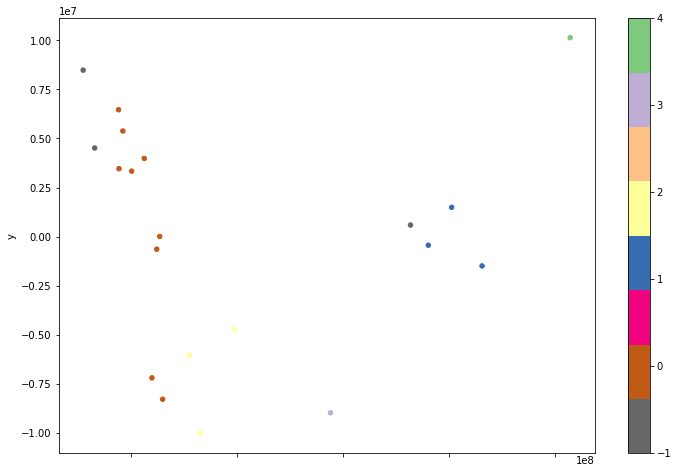

In [11]:
df_football_pca.plot(kind='scatter',
                    x='x',
                    y='y',
                    c=preds,
                    cmap='Accent_r',
                    figsize=(12,8))

## Conclusions
As i said at the start of Notebook, we can't make conclusions with a clustering of 20 rows, this is not the way to analyze this kind of data. we can draw conclusions by making an EDA, a matrix of distances, etc. But never do a clustering with 20 data, as you can saw in the centers and in the hyperparameters (70M of bandwidth is a very, very extremme value), the values of the predictions are very extremme and not useful. **This is only for learn to use Mean Shift with Sklearn**

### Pros
* The algorithm discard point (all the gray points in the plot)
* We don't need to set the number of clusters, bandwith do the work for us.

### Cons
* The cluster are always spherical
* is not a widely used algorithm